In [1]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Sampling ##

Let's do an example where we sample from a Bernoulli distribution. A Bernoulli distribution has only two outcomes and a probability attached with each outcome.

E.g. tossing a coin, a drug is effective or not, a catalyst is effective or not, a safety value is activates or not.


In [3]:
#Let's do an example where we sample from a Bernoulli distribution.
#Suppose a drug is effective 97% of the time.
np.random.binomial(n=1,p=0.97,size=1)


array([1])

In [7]:
np.random.binomial(n=1,p=0.5,size=1)

array([0])

In [8]:
#How about if we sample 100 times?
np.random.binomial(n=1,p=0.97,size = 100)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
#We want to work out the proportion of effective in our sample.
samples = np.random.binomial(n=1, p=0.97,size =100)
sum(samples)/len(samples)

0.99

In [17]:
#Let's do a similar experiment with tossing a coin with 1000 tosses
coin_toss = np.random.binomial(n=1, p =0.5, size =1000)
sum(coin_toss)/len(coin_toss)

0.512

## Fair Coin or Not ##

Let's do an example to determine if what we observed in real life is likely or unlikely based on some model distribution. A fair coin has a probability of 0.5 probability for heads and 0.5 probability for tails.

Suppose, I toss a coin 100 times and observe that heads fell 75% of the time.

Is my coin a fair coin or not?

In [18]:
#sample 100 times
samples = np.random.binomial(n=1, p=0.5, size = 100)
sum(samples)/len(samples)

0.54

In [19]:
#let's put the above in a function so we can re-use it easily
def samples_proportion():
  samples = np.random.binomial(n=1, p=0.5, size = 100)
  return sum(samples)/len(samples)

In [22]:
#Test the function
samples_proportion()

0.49

In [24]:
#Run the above 10000 times and store it in an array
results=[]

for i in np.arange(10000):
  results.append(samples_proportion())

results

[0.6,
 0.51,
 0.5,
 0.54,
 0.58,
 0.49,
 0.47,
 0.56,
 0.51,
 0.49,
 0.59,
 0.52,
 0.37,
 0.5,
 0.51,
 0.58,
 0.54,
 0.57,
 0.52,
 0.54,
 0.49,
 0.47,
 0.55,
 0.53,
 0.47,
 0.45,
 0.44,
 0.49,
 0.53,
 0.58,
 0.52,
 0.52,
 0.52,
 0.54,
 0.44,
 0.52,
 0.54,
 0.49,
 0.38,
 0.55,
 0.51,
 0.52,
 0.46,
 0.59,
 0.56,
 0.47,
 0.48,
 0.42,
 0.46,
 0.48,
 0.44,
 0.48,
 0.51,
 0.56,
 0.47,
 0.47,
 0.58,
 0.5,
 0.49,
 0.53,
 0.48,
 0.52,
 0.51,
 0.42,
 0.55,
 0.54,
 0.54,
 0.47,
 0.56,
 0.46,
 0.45,
 0.5,
 0.42,
 0.44,
 0.55,
 0.55,
 0.51,
 0.55,
 0.47,
 0.54,
 0.45,
 0.53,
 0.53,
 0.54,
 0.51,
 0.51,
 0.41,
 0.48,
 0.6,
 0.46,
 0.54,
 0.49,
 0.56,
 0.41,
 0.54,
 0.53,
 0.4,
 0.53,
 0.52,
 0.52,
 0.46,
 0.51,
 0.5,
 0.49,
 0.49,
 0.52,
 0.54,
 0.47,
 0.4,
 0.55,
 0.41,
 0.5,
 0.53,
 0.49,
 0.42,
 0.44,
 0.5,
 0.53,
 0.44,
 0.55,
 0.51,
 0.49,
 0.53,
 0.39,
 0.51,
 0.48,
 0.47,
 0.6,
 0.46,
 0.45,
 0.53,
 0.46,
 0.58,
 0.52,
 0.48,
 0.56,
 0.48,
 0.46,
 0.55,
 0.51,
 0.48,
 0.48,
 0.38,
 0.52,
 0.4

(-500.0, 3500.0)

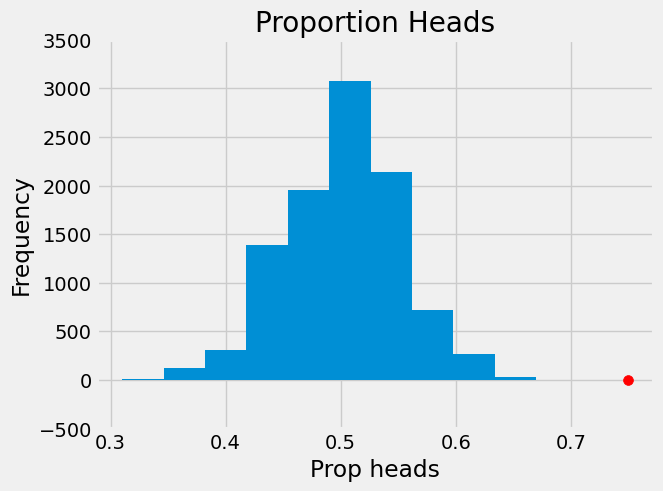

In [30]:
#Draw a histogram
df = pd.DataFrame(results,columns=['results'])
df.hist('results')

plots.title("Proportion Heads")
plots.xlabel("Prop heads")
plots.ylabel("Frequency")

plots.scatter(0.75,0,color='red',s=50)
plots.ylim(-500,3500)

## Mendel and Pea Flowers ##

Mendel observed that out of the 929 plants, 709 had purple flowers. However, the expected proportion of purple flowers was 75%.

In [31]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709/929
observed_purples

0.7631862217438106

In [34]:
#First we sample from the model distribution with purple probability being 0.75
samples = np.random.binomial(n=1, p=0.75, size = 929)
sum(samples)/len(samples)

0.7438105489773951

In [37]:
#Then we create a function
def purple_flowers():
  samples = np.random.binomial(n=1, p=0.75, size = 929)
  return sum(samples)/len(samples)

In [40]:
#test the function
purple_flowers()


0.7405812701829925

In [44]:
#sample multiple times
results = []

for i in np.arange(10000):
  results.append(purple_flowers())

results

[0.7373519913885899,
 0.7588805166846071,
 0.7664155005382132,
 0.7534983853606028,
 0.721205597416577,
 0.7481162540365985,
 0.7545748116254036,
 0.7341227125941873,
 0.7470398277717977,
 0.7448869752421959,
 0.7384284176533907,
 0.736275565123789,
 0.7459634015069968,
 0.7459634015069968,
 0.7621097954790097,
 0.7685683530678149,
 0.7481162540365985,
 0.7448869752421959,
 0.7481162540365985,
 0.7373519913885899,
 0.7341227125941873,
 0.7416576964477933,
 0.7524219590958019,
 0.7524219590958019,
 0.7319698600645855,
 0.7556512378902045,
 0.7771797631862217,
 0.7793326157158235,
 0.7545748116254036,
 0.7384284176533907,
 0.7653390742734123,
 0.7491926803013994,
 0.7502691065662002,
 0.7459634015069968,
 0.7427341227125942,
 0.7384284176533907,
 0.7276641550053822,
 0.7330462863293864,
 0.7341227125941873,
 0.7265877287405813,
 0.759956942949408,
 0.7631862217438106,
 0.7341227125941873,
 0.7319698600645855,
 0.7470398277717977,
 0.7621097954790097,
 0.7556512378902045,
 0.7319698600645

(-500.0, 3500.0)

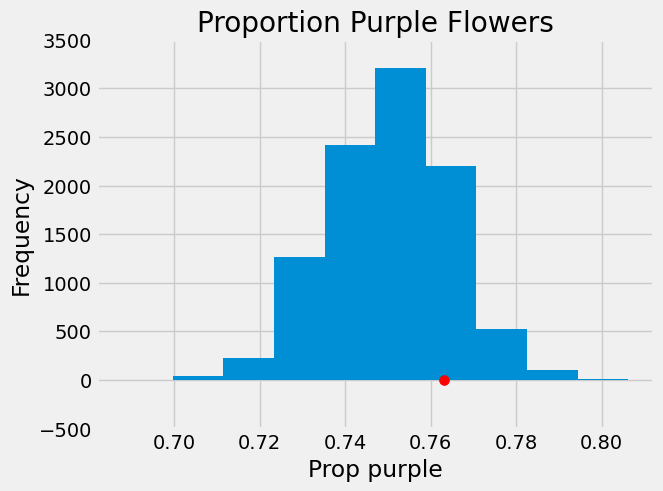

In [45]:
#plot a histogram
df = pd.DataFrame(results,columns=['Prop_purples'])
df.hist('Prop_purples')

plots.title("Proportion Purple Flowers")
plots.xlabel("Prop purple")
plots.ylabel("Frequency")

plots.scatter(observed_purples,0,color='red',s=50)
plots.ylim(-500,3500)